In [1]:
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

Date Calculation 

In [2]:
#used Rajib's starter code 

end_date = datetime.today().strftime('%Y-%m-%d')
end_date_split = end_date.split("-")
end_date_year = end_date_split[0]
end_date_month = end_date_split[1]
end_date_day = end_date_split[2]
beg_date_year = int(end_date_year) -5 
beg_date = str(beg_date_year) + "-" + end_date_month + "-" + end_date_day


Transport Data Analysis

In [3]:
# get the data

transport_stock_df = pd.DataFrame()
transport_stock_df["Stock Name"] = ''
transport_stock_df["Date"] = ''
transport_stock_df["Open"] = ''
transport_stock_df["High"] = ''
transport_stock_df["Low"] = ''
transport_stock_df["Close"] = ''
transport_stock_df["Adj Close"] = ''
transport_stock_df["Volume"] = ''


stocks = ["AAL", "JBLU"]
for stock in stocks : 
    data = yf.download(stock, start = beg_date,
                   end = end_date)
    data["Stock Name"] = stock
    data = data.reset_index()
    #stock_df = pd.merge(pd.merge(stock_df,data,on='Date'))
    #stock_df = stock_df.merge(data, how='right')
    transport_stock_df = transport_stock_df.append(data, ignore_index = True)

transport_stock_df.head()

[*********************100%***********************]  1 of 1 completed


C:\Users\Theresa\AppData\Local\Temp\ipykernel_13452\2766088459.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transport_stock_df = transport_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\Theresa\AppData\Local\Temp\ipykernel_13452\2766088459.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transport_stock_df = transport_stock_df.append(data, ignore_index = True)


,Stock Name,Date,Open,High,Low,Close,Adj Close,Volume
0,AAL,2018-08-10,37.750000,37.790001,36.450001,37.259998,36.566166,7481700
1,AAL,2018-08-13,37.290001,37.330002,36.680000,36.790001,36.104923,4051800
2,AAL,2018-08-14,36.840000,37.560001,36.830002,37.090000,36.399330,3873000
3,AAL,2018-08-15,36.959999,37.509998,36.419998,37.439999,36.742817,5599200
4,AAL,2018-08-16,37.750000,38.459999,37.439999,38.160000,37.449406,5876500


In [4]:
transport_stock_df.tail()

,Stock Name,Date,Open,High,Low,Close,Adj Close,Volume
2509,JBLU,2023-08-03,6.80,6.82,6.58,6.65,6.65,26590700
2510,JBLU,2023-08-04,6.70,6.77,6.60,6.68,6.68,20385700
2511,JBLU,2023-08-07,6.65,6.69,6.34,6.47,6.47,23526700
2512,JBLU,2023-08-08,6.36,6.57,6.32,6.56,6.56,22180000
2513,JBLU,2023-08-09,6.56,6.64,6.40,6.48,6.48,15028200


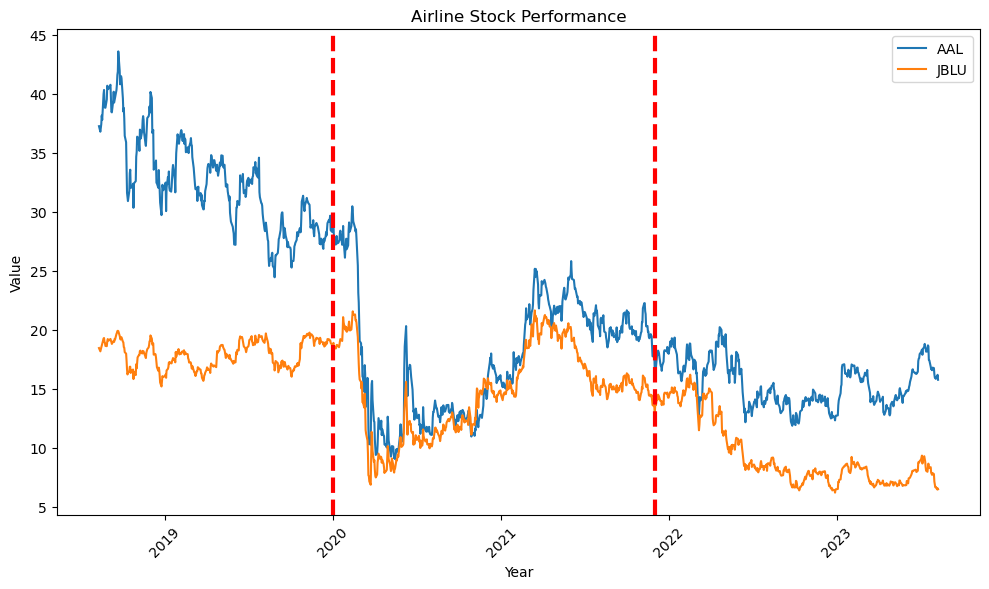

In [5]:
import datetime

# Generate a line plot of stock prices vs date
plot_AAL = transport_stock_df.loc[transport_stock_df["Stock Name"] == "AAL"]
plot_JBLU = transport_stock_df.loc[transport_stock_df["Stock Name"] == "JBLU"]

plt.figure(figsize = (10,6))
plt.plot(plot_AAL["Date"], plot_AAL["Close"], label="AAL")
plt.plot(plot_JBLU["Date"], plot_JBLU["Close"], label="JBLU")

#Format line plot and label axis 

plt.axvline(datetime.datetime(2020, 1, 1), color='red', linewidth=3, linestyle='--')
plt.axvline(datetime.datetime(2021, 12, 1), color='red', linewidth=3, linestyle='--')
plt.title("Airline Stock Performance")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()

# Show the chart
plt.show()

There is a sharp decline in value for both airline stocks in 2020 most likely due to the Covid 19 pandemic. Governments began to restrict travel with lockdowns due to uncertainty of the virus and how it spreads. Economic hardships negatively impacted passengers reducing the amount of money spent for transportation. Supply chain distruptions affected the availabilty of goods needed by the travel industries weakening investor confidence and causing stock prices to decline. After 2021 there is some improvement in stock prices but both stock values are still recovering. 

In [7]:
#Statistical Analysis

#Determine if there are any potential outliers
aal_quartiles = plot_AAL["Close"].quantile([.25,.5,.75])
aal_lowerq = quartiles[0.25]
aal_upperq = quartiles[0.75]
aal_iqr = upperq-lowerq

print(f"The lower quartile is: {aal_lowerq}")
print(f"The upper quartileis: {aal_upperq}")
print(f"The interquartile range is: {aal_iqr}")
print(f"The the medianis: {aal_quartiles[0.5]} ")

aal_lower_bound = aal_lowerq - (1.5*iqr)
aal_upper_bound = aal_upperq + (1.5*iqr)
print(f"Values below {aal_lower_bound} could be outliers.")
print(f"Values above {aal_upper_bound} could be outliers.")

aal_transport_outliers= plot_AAL.loc[(plot_AAL["Close"] < lower_bound) | (plot_AAL["Close"] > upper_bound)]
aal_transport_outliers

The lower quartile is: 12.742499828338623
The upper quartileis: 19.65499973297119
The interquartile rangeis: 6.912499904632568
The the medianis: 18.31999969482422 
Values below 2.3737499713897705 could be outliers.
Values above 30.023749589920044 could be outliers.


,Stock Name,Date,Open,High,Low,Close,Adj Close,Volume
0,AAL,2018-08-10,37.750000,37.790001,36.450001,37.259998,36.566166,7481700
1,AAL,2018-08-13,37.290001,37.330002,36.680000,36.790001,36.104923,4051800
2,AAL,2018-08-14,36.840000,37.560001,36.830002,37.090000,36.399330,3873000
3,AAL,2018-08-15,36.959999,37.509998,36.419998,37.439999,36.742817,5599200
4,AAL,2018-08-16,37.750000,38.459999,37.439999,38.160000,37.449406,5876500
...,...,...,...,...,...,...,...,...
313,AAL,2019-11-07,31.209999,31.440001,30.750000,30.889999,30.776266,6342400
314,AAL,2019-11-08,30.719999,30.850000,29.959999,30.760000,30.646746,6352900
315,AAL,2019-11-11,30.540001,30.750000,30.200001,30.590000,30.477371,4109100
378,AAL,2020-02-12,30.000000,30.780001,29.990000,30.469999,30.469999,9315400


In [8]:
#Determine if there are any potential outliers
jblu_quartiles = plot_JBLU["Close"].quantile([.25,.5,.75])
jblu_lowerq = quartiles[0.25]
jblu_upperq = quartiles[0.75]
jblu_iqr = upperq-lowerq

print(f"The lower quartile is: {jblu_lowerq}")
print(f"The upper quartileis: {jblu_upperq}")
print(f"The interquartile range is: {jblu_iqr}")
print(f"The the medianis: {jblu_quartiles[0.5]} ")

jblu_lower_bound = jblu_lowerq - (1.5*iqr)
jblu_upper_bound = jblu_upperq + (1.5*iqr)
print(f"Values below {jblu_lower_bound} could be outliers.")
print(f"Values above {jblu_upper_bound} could be outliers.")

jblu_transport_outliers= plot_JBLU.loc[(plot_JBLU["Close"] < lower_bound) | (plot_JBLU["Close"] > upper_bound)]
jblu_transport_outliers

The lower quartile is: 12.742499828338623
The upper quartileis: 19.65499973297119
The interquartile rangeis: 6.912499904632568
The the medianis: 14.789999961853027 
Values below 2.3737499713897705 could be outliers.
Values above 30.023749589920044 could be outliers.


,Stock Name,Date,Open,High,Low,Close,Adj Close,Volume


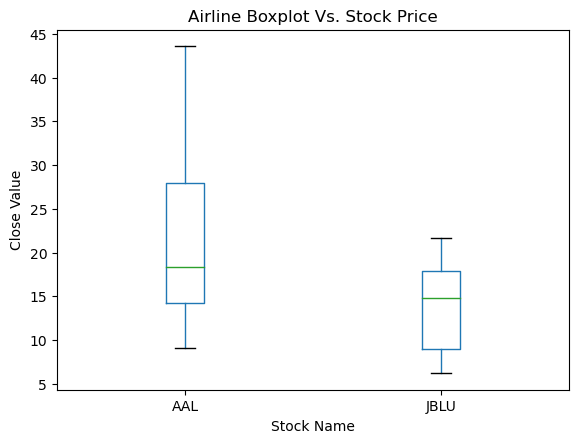

In [18]:
ax1 = transport_stock_df.boxplot(by ="Stock Name", column =["Close"], grid = False, ylabel="Close Value",xlabel="Stock Name")
plt.title("Airline Boxplot Vs. Stock Price")
plt.suptitle('') 
plt.show()